> # **Name:** _Omar Rashad Salem_
> # **Course:** _CV - prof.Heba_
> # **Assignemnt No.:** _4_

> ## QUESTIONS

##### _1)_ **What is the primary difference between a traditional computer program and a neural network in terms of problem-solving?**

**ans:** The main difference is that:
* traditional computer programs often needs manual modification and interaction and is not as independent as the neural networks once they are built/implemented. 
* Also you have to explicitly tell all the data/parameters to traditional computer programs which is not the case for neural networks.
----

##### _2)_ **You have a neural network with three layers: an input layer with 100 neurons, a hidden layer with 50 neurons, and an output layer with 10 neurons. If each neuron in the hidden layer is connected to each neuron in the input and output layers, calculate the total number of weights in the network?**

**ans:** 

* _each connection between two neorons must has a weight._

$$
w_1 = \text{(input layer neurons no)} * \text{(hidden layer neurons no)} 

\\

\therefore w_1 = 100 * 50 = 5,000

\\

w_2 = \text{(hidden layer neurons no)} * \text{(ouput layer neurons no)}


\\

\therefore w_2 = 50 * 10 = 500

\\

w_{tot} = 5,000 + 500

\\

\textbf{answer: W = 5,500}

$$

----
##### _3)_ **Suppose you are training a neural network for image classification with a batch size of 32, and you have 10,000 training images. How many weight updates will occur during one epoch (one pass through the entire training dataset)?**

**ans:** each batch will update weights once:

$$
\text{no. of batches } = \frac{\text{no. of images }}  {\text{batch size}}

\\

\text{no. of batches } = 313 

\\

\therefore \textbf{no. of updates } =  313

\\
$$

----
##### _4)_ **What is backpropagation, and why is it important in training neural networks?**

**ans:**
* __backpropagation:__ recursive application of the chain rule along a computational graph to compute the gradients of all inputs/parameters/intermediates. and happends in upstream direction of the newtowrk (backwards)

* __Importance:__ an efficient technique to compute gradient that **SGD** uses. which is an optimization algorithm used to adjust the model's weights and biases during the training process, allowing the network to learn from data and improve its performance.

----
##### _5)_ **Given an image with dimensions 100x100 pixels and a convolutional layer with a 3x3 filter and no padding, calculate the dimensions of the feature map produced.?**

**ans:** 

W = 10,000 pixesl , K = 9 pixels , p = 0

$$
\text{feature map size } = W - K + 1 + 2p
\\
\therefore \textbf{feature map size } = 9,992 pixels
$$

----
##### _6)_ **What are filters (kernels) in a convolutional layer, and how are they used to extract features from images?**

**ans:** 
* **kernels:** are small matrices used for the convolution operation. The convolutional layer applies these filters to input data, such as images, to extract important features. Each filter learns to detect specific patterns or features in the input.

* convolving kernels with specific weight distributions helps highliting unique image features by giving them higher weights e.g.(edges,corners & orientation) and hides unimportant parts of the image be giving them smaller/zero weights to be then be used as a calssifiers 



----

> ## Programming Assignment: 
> #### MNIST Image Classification with a Simple Neural Network

_Build and train a basic neural network to classify handwritten digits from the MNIST dataset. Experiment with different hyperparameters to observe their impact on model performance._


**Experimentation:**

•          Change hyperparameters systematically and observe their effects on model performance.

•          For instance, test different learning rates, layer configurations, or batch sizes.

**Reporting:**

•          Summarize results with tables or charts.


•          Discuss how changing hyperparameters impacted the model's performance.

> #### 1) implement mini functions we need


In [8]:
#FUNCTIONS we need 
import numpy as np
from numpy.random import randn
from keras.datasets import mnist
from sklearn.model_selection import train_test_split



def ReLu(x , w1):
   h = np.maximum(0, x.dot(w1))
   return h
def Sigmoid(x, w1):
   h = 1.0 / (1.0 + np.exp(-x.dot(w1)))
   return h

def softmax(y_pred, y_batch, batch_sz):
   y_pred = np.exp(y_pred)
   y_true = []
   for i, img_scores in enumerate(y_pred):
      for _ in range(10):
         y_true += [img_scores[y_batch[i]]]

   y_true = np.array(y_true).reshape((batch_sz,10))
   
   #get the normalized value of all scores
   non_normalized_sum = y_pred.sum(axis=1)
   normalized_value = (y_true[:,0] / non_normalized_sum[:])
   true_label_probability = normalized_value.mean()
   
   SOFTMAX_Loss = -np.log(true_label_probability)  #natural log ln()

   return SOFTMAX_Loss

def MSE(y_pred, y_batch, batch_sz):
   y_true = []
   for i, img_scores in enumerate(y_pred):
      for _ in range(10):
         y_true += [img_scores[y_batch[i]]]

   y_true = np.array(y_true).reshape((batch_sz,10))
   
   MSE_loss = np.square(y_pred[:,:] - y_true[:,:]).sum() #NOTE: might OF
   
   return MSE_loss

> #### 2) load your dataset & define Hyperparameter & implement train and test functions


In [9]:
#load your dataset and implement train and test functions

#60k train  and 10k test ( 28X28 images of handwritten digits 0~9)
(xtr, ytr), (xtst, ytst) = mnist.load_data()
xtr, xtst = xtr/255.0, xtst/255.0 #normalize 0~1

# Split training data into training and evaluation sets
xtr, xev, ytr, yev = train_test_split(xtr, ytr, test_size=10000, random_state=42)
xtr = xtr.reshape((50000,784))
xtst = xtst.reshape((10000,784))
xev = xev.reshape((10000,784))
classes_no = 10 #10 labels one for each digit


#init your hyperparameters
learn_rate = [1e-4,0.10,0.25]
passes = [5,10,100]
batch_sz = [10,100,1000]
din = 28*28 #28X28 = 784 neuron for each pixel
dout = 10 #10 classes one for each digit0~9
H = [10,40,100] #number of neuorns in hidden layer ( we have one input layer , one hidden , one ouput layer )
w1, w2 = randn(din, H[0]), randn(H[0], dout)


def train(x, w1, w2, y, batch_sz= 100, H= 10, passes = 10, learn_rate = 0.1, actv='relu', loss_f='mse'):
   loss = None
   
   for epoch in range(passes):
      #shuffle dataset to prevent biase (over fitting?)
      shuffled_idx = np.random.shuffle(np.arange(x.shape[0]))
      shuffled_idy = np.random.shuffle(np.arange(y.shape[0]))
      x = x[shuffled_idx].squeeze(axis=(0,))
      y = y[shuffled_idx].squeeze(axis=(0,))


      #batches to introduce noise and to get out of sadle points and local minimum situations
      for batch_st in range(0, x.shape[0], batch_sz):
         batch_end = batch_st + batch_sz
         x_batch = x[batch_st:batch_end]
         y_batch = y[batch_st:batch_end]
         # y_batch_hot = to_categorical(y_batch, num_classes= classes_no)
         
      #NOTE: downstream (forward)
         h = ReLu(x_batch, w1) if actv == 'relu' else Sigmoid(x_batch, w1)
         y_pred = h.dot(w2)
         
         loss = MSE(y_pred, y_batch, batch_sz) if loss_f == 'mse' else softmax(y_pred, y_batch, batch_sz)
         
         y_true = []
         for i, img_scores in enumerate(y_pred):
            for _ in range(classes_no): y_true += [img_scores[y_batch[i]]]
         y_true = np.array(y_true).reshape((batch_sz,classes_no))           
         
      #NOTE: upstream(backward propagation)
         dl = 1.0 # dl/dl
         dy_pred = 2.0 * (y_pred[:,:] - y_true[:,:])# dl/dy batch_sz*10
         dw2 = h.T @ dy_pred # dl/sw2  (NOTE: '@' is shortcut for arr.dot(arr2))
         dh = dy_pred.dot(w2.T)# dl/dh
         dw1 = x_batch.T.dot((dh * (h > 0))) if actv == 'relu' else x_batch.T.dot(dh*h*(1-h))# dl/dw1
         
         #get the new weights 
         w1 -= learn_rate * dw1
         w2 -= learn_rate * dw2
   return w1, w2, loss

def test(x, y, w1, w2, actv= 'relu', loss_f= 'softmax'): #TODO
   h = ReLu(x, w1) if actv == 'relu' else Sigmoid(x, w1)
   y_pred = h.dot(w2)
   loss = MSE(y_pred, y, y.shape[0]) if loss_f == 'mse' else softmax(y_pred, y, y.shape[0])
   
   highest_score_labels = np.argmax(y_pred, axis=1) #returns indx of max val
   true_labels = y
   
   correct = np.sum(highest_score_labels == true_labels)
   accuracy = (correct / len(y)) * 100.0
   
   return (accuracy, loss, w1, w2, highest_score_labels)





> #### 3) train & Test & save results

In [10]:
# result = [[None]]*3 # list of 3 lists each one has the [acc,loss, w1, w2,highest_score_labels]
result = [[] for _ in range(3)]  #empty nested list [[],[],[]]

#test using test imageset (10k images) and train with 50k images
for i in range(3):
   print("\n##############\n")
   for j in range(3):
      if i == 0:
         w1, w2, tr_loss = train(xtr, w1, w2, ytr, batch_sz= batch_sz[j], H= 10, passes = 5, learn_rate = 0.1, actv='relu', loss_f='mse')
         result[i] += [test(xtst, ytst, w1, w2)]
         print(f'testing(batch size) accuracy result({j}) = {result[i][j][0]}')
      elif i == 1:
         w1, w2, tr_loss = train(xtr, w1, w2, ytr, batch_sz= 100, H= 10, passes = passes[j], learn_rate = 0.1, actv='relu', loss_f='mse')
         result[i] += [test(xtst, ytst, w1, w2)]
         print(f'testing(epoch numbers) accuracy result({j}) = {result[i][j][0]}')
      elif i == 2:
         w1, w2, tr_loss = train(xtr, w1, w2, ytr, batch_sz= 100, H= 10, passes = 5, learn_rate = learn_rate[j], actv='relu', loss_f='mse')
         result[i] += [test(xtst, ytst, w1, w2)]
         print(f'testing(learn rates) accuracy result({j}) = {result[i][j][0]}')

   


##############

testing(batch size) accuracy result(0) = 9.8
testing(batch size) accuracy result(1) = 9.8
testing(batch size) accuracy result(2) = 9.8

##############

testing(epoch numbers) accuracy result(0) = 9.8
testing(epoch numbers) accuracy result(1) = 9.8
testing(epoch numbers) accuracy result(2) = 9.8

##############

testing(learn rates) accuracy result(0) = 9.8
testing(learn rates) accuracy result(1) = 9.8
testing(learn rates) accuracy result(2) = 9.8


> #### 4) Performance plots 

* _only one hyperparameter is changed per plot_
* _Using MSE loss & ReLu Activation functions in all Plots_

C:\Users\OmarPc\AppData\Local\Temp\ipykernel_14368\1175319467.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(result).squeeze()


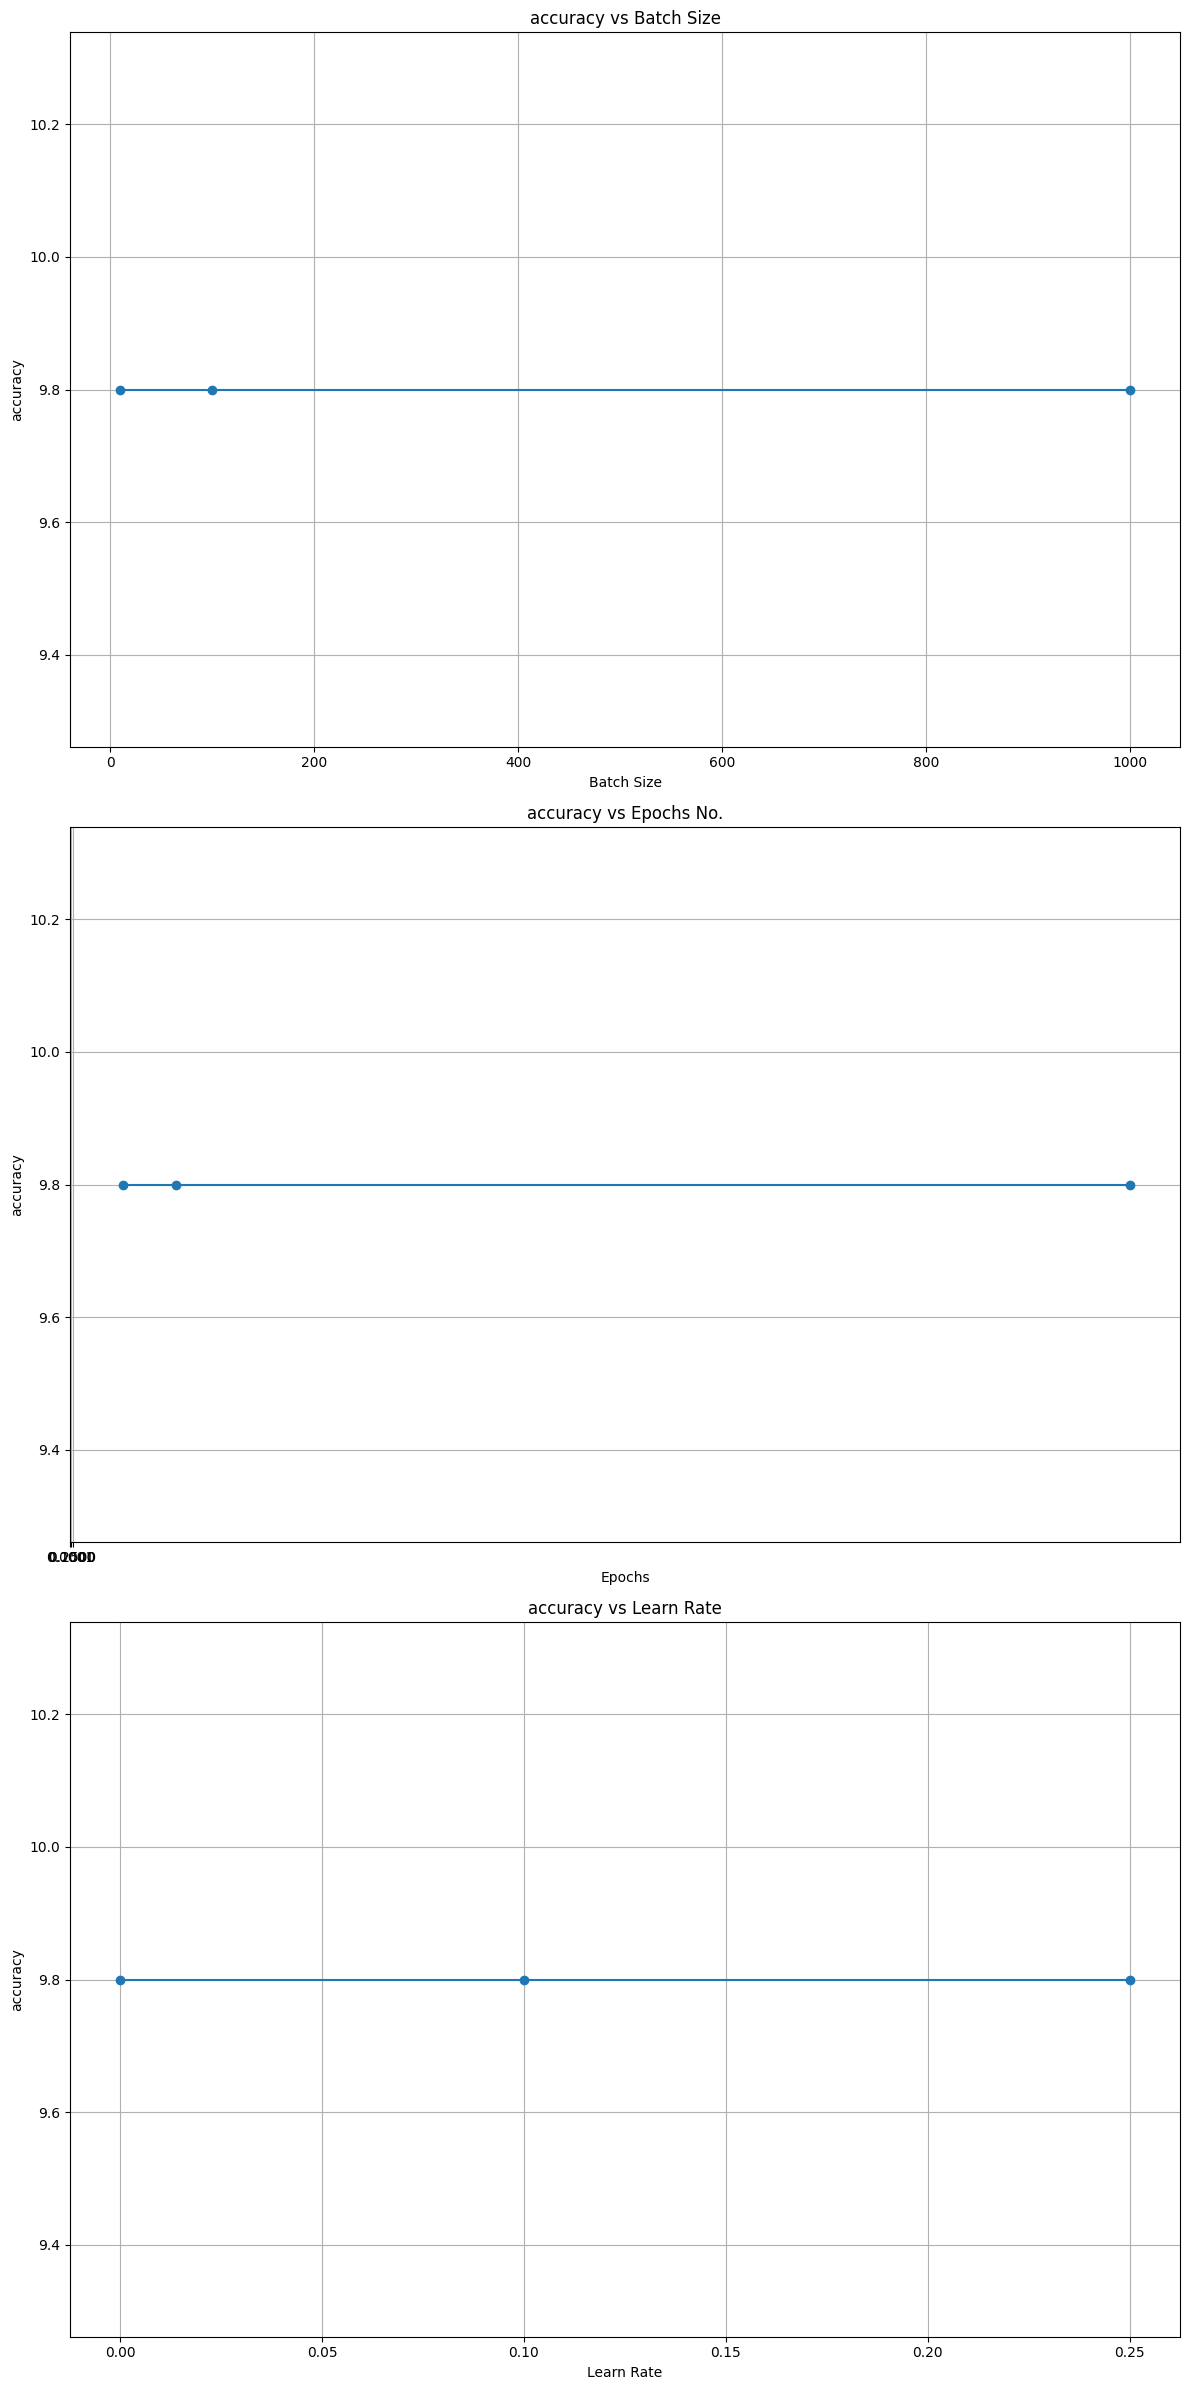

In [11]:
import matplotlib.pyplot as plt

result = np.array(result).squeeze()

fig, axs = plt.subplots(3, 1, figsize=(12, 24))  # 1 row, 2 columns for subplots

accuracy0 = [result[0][0][0], result[0][1][0], result[0][2][0]]
axs[0].plot(batch_sz, accuracy0, marker='o', linestyle='-')
axs[0].set_title('accuracy vs Batch Size')
axs[0].set_xlabel('Batch Size')
axs[1].set_xticks(batch_sz)
axs[0].set_ylabel('accuracy')
axs[0].grid(True)


accuracy1 = [result[1][0][0], result[1][1][0], result[1][2][0]]
axs[1].plot(passes, accuracy1, marker='o', linestyle='-')
axs[1].set_title('accuracy vs Epochs No.')
axs[1].set_xlabel('Epochs')
axs[1].set_xticks(passes)
axs[1].set_ylabel('accuracy')
axs[1].grid(True)

accuracy2 = [result[2][0][0], result[2][1][0], result[2][2][0]]
axs[2].plot(learn_rate, accuracy2 , marker='o', linestyle='-')
axs[2].set_title('accuracy vs Learn Rate')
axs[2].set_xlabel('Learn Rate')
axs[1].set_xticks(learn_rate)
axs[2].set_ylabel('accuracy')
axs[2].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show plots
plt.show()
